# Preface
My occupation is wizard: I wave my magic wand and shit happens. 
> We are about to talk about study the idea of a computational process. Computational processes are abstract beings that inhabit computers. As they evolve, processes manipulate other abstract things called data. The evolution of a process is directed by a pattern of rules called a program. People create programs to direct processes. In effect, we conjure the spirits of the computer with our spells.

One of the factions in Hogwarts pushes the agenda of embracing computational process that emulates human brain and saught to obtain the oracle of solving complex problems which other factions struggled to solve. The protagonist faction in this book calls themselves Connectionists, and this is the story of connectionsm.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

# source file mlp.py
import mlp

## Multi-layer perceptrons

- 3 layer architecture
- feed forward
- backpropagate for gradient descent
- update _once_ every epoch, not during sample loop
- training testing split, testing set untouchable
- mini batch gradient descent for hand-written letter


In [3]:
xor_X,xor_y = mlp.get_Xor_data()

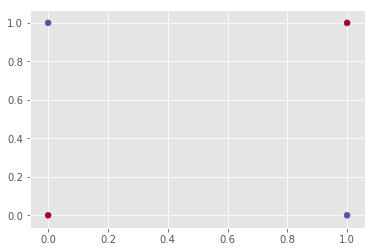

In [4]:
plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

In [5]:
# 2 hidden unit MLP for XOR demonstration
xor_mlp_2 = mlp.MLP(xor_X, xor_y, 2)

In [6]:
_,losslog =xor_mlp_2.train(print_loss=True)

Data loss (cross entropy) after epoch 0: 0.6861598242933123
Data loss (cross entropy) after epoch 2000: 0.5028045648406304
Data loss (cross entropy) after epoch 4000: 0.4788524896088624
Data loss (cross entropy) after epoch 6000: 0.030596319443061508
Data loss (cross entropy) after epoch 8000: 0.012764644071794779
Data loss (cross entropy) after epoch 10000: 0.007943765071568059
Data loss (cross entropy) after epoch 12000: 0.005736992837964628
Data loss (cross entropy) after epoch 14000: 0.00447906407383213
Data loss (cross entropy) after epoch 16000: 0.0036686582180509436
Data loss (cross entropy) after epoch 18000: 0.0031039719089720483
Data loss (cross entropy) after epoch 20000: 0.0026884077996359853
Data loss (cross entropy) after epoch 22000: 0.0023700195106840447
Data loss (cross entropy) after epoch 24000: 0.002118422822539832
Data loss (cross entropy) after epoch 26000: 0.0019146763676030475
Data loss (cross entropy) after epoch 28000: 0.0017463663143026439
Data loss (cross en

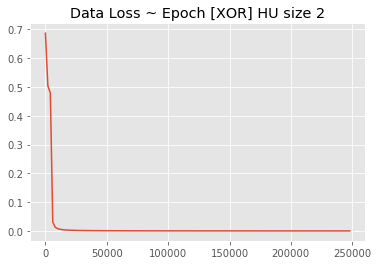

In [7]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Data Loss ~ Epoch [XOR] HU size {0}".format(2))

In [8]:
def plot_xor_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = xor_X[:, 0].min() - .5, xor_X[:, 0].max() + .5
    y_min, y_max = xor_X[:, 1].min() - .5, xor_X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(xor_X[:,0],xor_X[:,1], c=xor_y[:,1], cmap=plt.cm.Spectral)

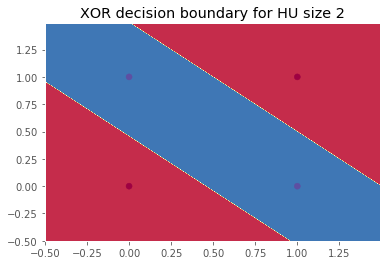

In [9]:
plot_xor_decision_boundary(lambda x: xor_mlp_2.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(2))

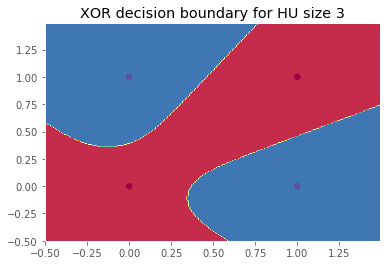

In [10]:
xor_mlp_3 = mlp.MLP(xor_X, xor_y, 3)
xor_mlp_3.train()
plot_xor_decision_boundary(lambda x: xor_mlp_3.predict(x))
plt.title("XOR decision boundary for HU size {0}".format(3))

In [ ]:
## sine experiment

X = [...] of shape (50,4)


$y_i = sin(\sum_j{x_{i,j}})$



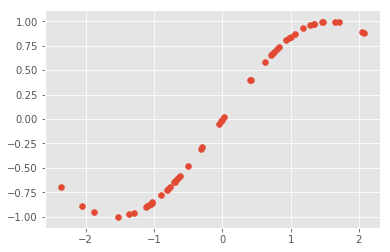

In [11]:
x,y = mlp.get_Sine_data()
trainingX, trainingy,testingX,testingy = mlp.get_data_split(x,y,0.8)
sine_hu_size = 5
sine_mlp = mlp.MLP(X=trainingX, y=trainingy, hu_size=sine_hu_size)

plt.scatter(x[:,0]+x[:,1]+x[:,2]+x[:,3],y)

In [12]:
acclog, losslog = sine_mlp.train(print_loss=True, testset_X=testingX, testset_y=testingy, classification=False)

Error (SSE) after epoch 0: [ 4.46174999]
Error (SSE) after epoch 2000: [ 0.03929822]
Error (SSE) after epoch 4000: [ 0.03342673]
Error (SSE) after epoch 6000: [ 0.03059426]
Error (SSE) after epoch 8000: [ 0.02861326]
Error (SSE) after epoch 10000: [ 0.02691947]
Error (SSE) after epoch 12000: [ 0.02545212]
Error (SSE) after epoch 14000: [ 0.02428472]
Error (SSE) after epoch 16000: [ 0.02341456]
Error (SSE) after epoch 18000: [ 0.02278468]
Error (SSE) after epoch 20000: [ 0.0223339]
Error (SSE) after epoch 22000: [ 0.02200501]
Error (SSE) after epoch 24000: [ 0.021752]
Error (SSE) after epoch 26000: [ 0.02154344]
Error (SSE) after epoch 28000: [ 0.02135969]
Error (SSE) after epoch 30000: [ 0.02118868]
Error (SSE) after epoch 32000: [ 0.02102284]
Error (SSE) after epoch 34000: [ 0.02085743]
Error (SSE) after epoch 36000: [ 0.02068983]
Error (SSE) after epoch 38000: [ 0.02051923]
Error (SSE) after epoch 40000: [ 0.02034615]
Error (SSE) after epoch 42000: [ 0.02017179]
Error (SSE) after epo

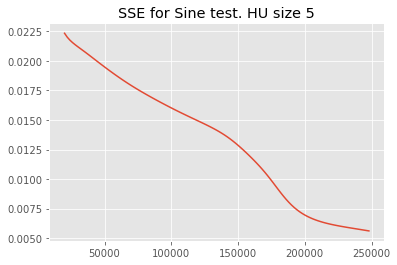

In [13]:
plt.plot([i[0] for i in losslog[10:]], [i[1] for i in losslog[10:]])
plt.title("SSE for Sine test. HU size {0}".format(sine_hu_size))

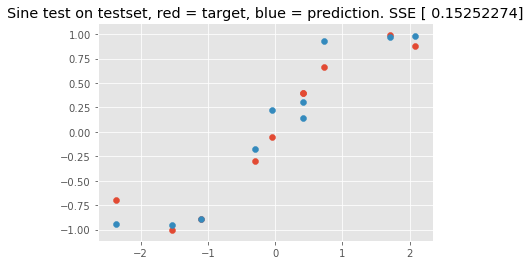

In [14]:
x = testingX
y = testingy
def linear_sine_components(x):
    return x[:,0] + x[:,1] + x[:,2] + x[:,3]
comb = linear_sine_components(x)
plt.scatter(comb,y)
# sine_mlp_10.predict(x,False)
y_hat = (sine_mlp.predict(x,False))['z2']
plt.scatter(comb,y_hat)
plt.title("Sine test on testset, red = target, blue = prediction. SSE {0}".
          format(0.5*np.sum(np.square(y_hat-y), axis=0)))


### Let's try again?

Error (SSE) after epoch 0: [ 4.46174999]
Error (SSE) after epoch 2000: [ 0.03929822]
Error (SSE) after epoch 4000: [ 0.03342673]
Error (SSE) after epoch 6000: [ 0.03059426]
Error (SSE) after epoch 8000: [ 0.02861326]
Error (SSE) after epoch 10000: [ 0.02691947]
Error (SSE) after epoch 12000: [ 0.02545212]
Error (SSE) after epoch 14000: [ 0.02428472]
Error (SSE) after epoch 16000: [ 0.02341456]
Error (SSE) after epoch 18000: [ 0.02278468]
Error (SSE) after epoch 20000: [ 0.0223339]
Error (SSE) after epoch 22000: [ 0.02200501]
Error (SSE) after epoch 24000: [ 0.021752]
Error (SSE) after epoch 26000: [ 0.02154344]
Error (SSE) after epoch 28000: [ 0.02135969]
Error (SSE) after epoch 30000: [ 0.02118868]
Error (SSE) after epoch 32000: [ 0.02102284]
Error (SSE) after epoch 34000: [ 0.02085743]
Error (SSE) after epoch 36000: [ 0.02068983]
Error (SSE) after epoch 38000: [ 0.02051923]
Error (SSE) after epoch 40000: [ 0.02034615]
Error (SSE) after epoch 42000: [ 0.02017179]
Error (SSE) after epo

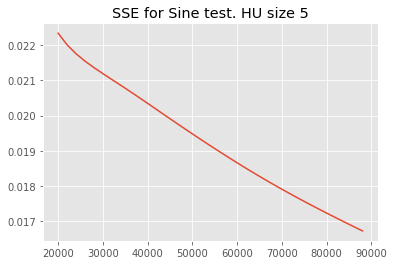

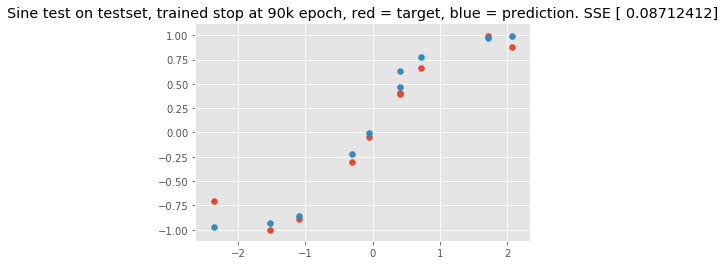

In [15]:
sine_hu_size = 5
sine_mlp = mlp.MLP(X=trainingX, y=trainingy, hu_size=sine_hu_size)
_,errorlog = sine_mlp.train(epoch=90000, print_loss=True
                            ,classification=False)
plt.plot([i[0] for i in errorlog[10:]], [i[1] for i in errorlog[10:]])
plt.title("SSE for Sine test. HU size {0}".format(sine_hu_size))
plt.show()
y_hat = (sine_mlp.predict(x,False))['z2']
plt.scatter(comb, y)
plt.scatter(comb, y_hat)
plt.title("Sine test on testset, trained stop at 90k epoch, red = target, blue = prediction. SSE {0}".
         format(0.5*np.sum(np.square(y_hat-y), axis=0)))

## Exceptional :)
- 16 attribute
- A-Z as classes
- 20000 samples
- 80% split (recommended)
- 10 hidden units (recommended)

In [16]:
import pandas as pd # only for csv reading, no other usage, i swear :)
dataset = pd.read_csv('letter-recognition.data',delimiter=',',header=None)
print("shape {0}".format(dataset.shape))
dataset.head()

shape (20000, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [17]:
hwl_X, hwl_y= mlp.get_Hwl_data()

In [18]:
training_X, training_y, testing_X, testing_y = mlp.get_data_split(hwl_X, hwl_y, 0.8)

In [19]:
training_X.shape[0]

16000

In [20]:
# recommended 10 hidden units
hwl_mlp_10 = mlp.MLP(training_X, training_y, 10)



# train using mini batch, batch size 16 (2^4 for cache friendliness, my laptop is poor)
acclog, losslog = hwl_mlp_10.train(batch_size=16, testset_X=testing_X, testset_y=testing_y, print_loss=True)

Data loss (cross entropy) after epoch 0: 3.2636384234828695
Accuracy after epoch 0: 0.0515
Data loss (cross entropy) after epoch 2000: 1.59682702728677
Accuracy after epoch 2000: 0.491
Data loss (cross entropy) after epoch 4000: 1.5279468824671987
Accuracy after epoch 4000: 0.5255
Data loss (cross entropy) after epoch 6000: 1.460747608879672
Accuracy after epoch 6000: 0.546
Data loss (cross entropy) after epoch 8000: 1.5987544985640412
Accuracy after epoch 8000: 0.5165
Data loss (cross entropy) after epoch 10000: 1.4551394070873298
Accuracy after epoch 10000: 0.5455
Data loss (cross entropy) after epoch 12000: 1.4193992269578486
Accuracy after epoch 12000: 0.5645
Data loss (cross entropy) after epoch 14000: 1.4006622281200876
Accuracy after epoch 14000: 0.5705
Data loss (cross entropy) after epoch 16000: 1.3903081107552193
Accuracy after epoch 16000: 0.5785
Data loss (cross entropy) after epoch 18000: 1.3286593035730505
Accuracy after epoch 18000: 0.5925
Data loss (cross entropy) after

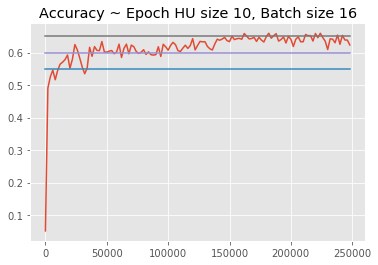

In [21]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.55)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.60)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.65)
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(10,16))

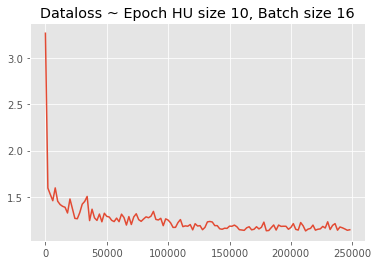

In [22]:
plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(10,16))

In [23]:
# trying 16 hidden units. rests are same premises as 10 units run
hwl_mlp_16 = mlp.MLP(training_X, training_y, 16)




# data loss is calcuated on training set
# accuracy is calculated on testing set
acclog,_ = hwl_mlp_16.train(batch_size=16, testset_X=testing_X, testset_y=testing_y)

Accuracy after epoch 0: 0.04725
Accuracy after epoch 2000: 0.5635
Accuracy after epoch 4000: 0.5965
Accuracy after epoch 6000: 0.64475
Accuracy after epoch 8000: 0.6575
Accuracy after epoch 10000: 0.67775
Accuracy after epoch 12000: 0.6595
Accuracy after epoch 14000: 0.68025
Accuracy after epoch 16000: 0.66125
Accuracy after epoch 18000: 0.6475
Accuracy after epoch 20000: 0.6985
Accuracy after epoch 22000: 0.68325
Accuracy after epoch 24000: 0.69025
Accuracy after epoch 26000: 0.6775
Accuracy after epoch 28000: 0.66825
Accuracy after epoch 30000: 0.65425
Accuracy after epoch 32000: 0.70125
Accuracy after epoch 34000: 0.654
Accuracy after epoch 36000: 0.7025
Accuracy after epoch 38000: 0.717
Accuracy after epoch 40000: 0.67275
Accuracy after epoch 42000: 0.707
Accuracy after epoch 44000: 0.69625
Accuracy after epoch 46000: 0.704
Accuracy after epoch 48000: 0.698
Accuracy after epoch 50000: 0.7175
Accuracy after epoch 52000: 0.69075
Accuracy after epoch 54000: 0.71325
Accuracy after epoc

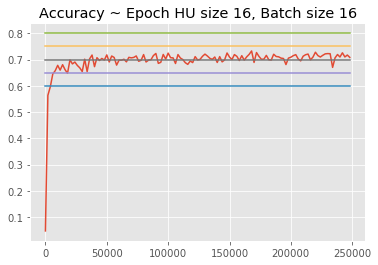

In [24]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.60)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.65)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.70)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.75)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.80)
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(16,16))

In [25]:
# plt.plot([i[0] for i in losslog],[i[1] for i in losslog])
# plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(16,16))

In [26]:
# trying 16 hidden units. rests are same premises as 10 units run
hwl_mlp_32 = mlp.MLP(training_X, training_y, 32)




# data loss is calcuated on training set
# accuracy is calculated on testing set
acclog,_ = hwl_mlp_32.train(batch_size=16, testset_X=testing_X, testset_y=testing_y)

Accuracy after epoch 0: 0.06025
Accuracy after epoch 2000: 0.64575
Accuracy after epoch 4000: 0.61125
Accuracy after epoch 6000: 0.67675
Accuracy after epoch 8000: 0.68425
Accuracy after epoch 10000: 0.691
Accuracy after epoch 12000: 0.70925
Accuracy after epoch 14000: 0.657
Accuracy after epoch 16000: 0.7055
Accuracy after epoch 18000: 0.7145
Accuracy after epoch 20000: 0.73525
Accuracy after epoch 22000: 0.74375
Accuracy after epoch 24000: 0.74325
Accuracy after epoch 26000: 0.74675
Accuracy after epoch 28000: 0.746
Accuracy after epoch 30000: 0.73775
Accuracy after epoch 32000: 0.73475
Accuracy after epoch 34000: 0.74175
Accuracy after epoch 36000: 0.76125
Accuracy after epoch 38000: 0.76625
Accuracy after epoch 40000: 0.76575
Accuracy after epoch 42000: 0.732
Accuracy after epoch 44000: 0.752
Accuracy after epoch 46000: 0.74525
Accuracy after epoch 48000: 0.78325
Accuracy after epoch 50000: 0.767
Accuracy after epoch 52000: 0.75525
Accuracy after epoch 54000: 0.77675
Accuracy after

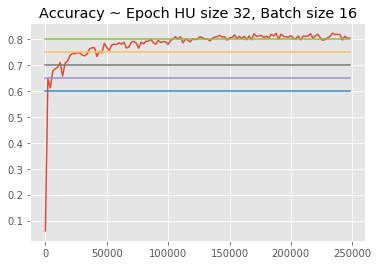

In [27]:
plt.plot([i[0] for i in acclog], [i[1] for i in acclog])
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.60)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.65)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.70)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.75)
plt.plot([i[0] for i in acclog], np.zeros((len(acclog), 1))+0.80)
plt.title("Accuracy ~ Epoch HU size {0}, Batch size {1}".format(32,16))

In [28]:
# plt.plot([i[0] for i in losslog],[i[1] for i in losslog])

# plt.title("Dataloss ~ Epoch HU size {0}, Batch size {1}".format(32,16))

### Ensemble!